Questions:
Credit and Thanks to P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import copy

pd.options.mode.chained_assignment = None

In [67]:
df = pd.read_csv("/kaggle/input/high-school-student-performance-and-demographics/student_math_clean.csv")

In [68]:
df.head().T

,0,1,2,3,4
student_id,1,2,3,4,5
school,GP,GP,GP,GP,GP
sex,F,F,F,F,F
age,18,17,15,15,16
address_type,Urban,Urban,Urban,Urban,Urban
family_size,Greater than 3,Greater than 3,Less than or equal to 3,Greater than 3,Greater than 3
parent_status,Apart,Living together,Living together,Living together,Living together
mother_education,higher education,primary education (4th grade),primary education (4th grade),higher education,secondary education
father_education,higher education,primary education (4th grade),primary education (4th grade),5th to 9th grade,secondary education
mother_job,at_home,at_home,at_home,health,other


In [69]:
for col in df:
    print(f"{col}:".ljust(25), f"{sum(df[col].isnull())} missing values.")
df.drop_duplicates()

student_id:               0 missing values.
school:                   0 missing values.
sex:                      0 missing values.
age:                      0 missing values.
address_type:             0 missing values.
family_size:              0 missing values.
parent_status:            0 missing values.
mother_education:         0 missing values.
father_education:         0 missing values.
mother_job:               0 missing values.
father_job:               0 missing values.
school_choice_reason:     0 missing values.
guardian:                 0 missing values.
travel_time:              0 missing values.
study_time:               0 missing values.
class_failures:           0 missing values.
school_support:           0 missing values.
family_support:           0 missing values.
extra_paid_classes:       0 missing values.
activities:               0 missing values.
nursery_school:           0 missing values.
higher_ed:                0 missing values.
internet_access:          0 miss

,student_id,school,sex,age,address_type,family_size,parent_status,mother_education,father_education,mother_job,...,family_relationship,free_time,social,weekday_alcohol,weekend_alcohol,health,absences,grade_1,grade_2,final_grade
0,1,GP,F,18,Urban,Greater than 3,Apart,higher education,higher education,at_home,...,4,3,4,1,1,3,6,5,6,6
1,2,GP,F,17,Urban,Greater than 3,Living together,primary education (4th grade),primary education (4th grade),at_home,...,5,3,3,1,1,3,4,5,5,6
2,3,GP,F,15,Urban,Less than or equal to 3,Living together,primary education (4th grade),primary education (4th grade),at_home,...,4,3,2,2,3,3,10,7,8,10
3,4,GP,F,15,Urban,Greater than 3,Living together,higher education,5th to 9th grade,health,...,3,2,2,1,1,5,2,15,14,15
4,5,GP,F,16,Urban,Greater than 3,Living together,secondary education,secondary education,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,391,MS,M,20,Urban,Less than or equal to 3,Apart,5th to 9th grade,5th to 9th grade,services,...,5,5,4,4,5,4,11,9,9,9
391,392,MS,M,17,Urban,Less than or equal to 3,Living together,secondary education,primary education (4th grade),services,...,2,4,5,3,4,2,3,14,16,16
392,393,MS,M,21,Rural,Greater than 3,Living together,primary education (4th grade),primary education (4th grade),other,...,5,5,3,3,3,3,3,10,8,7
393,394,MS,M,18,Rural,Less than or equal to 3,Living together,secondary education,5th to 9th grade,services,...,4,4,1,3,4,5,0,11,12,10


In [70]:
df = df.sort_values(by="final_grade",ascending=False)

In [71]:
# df.dtypes
df_numerized = copy.deepcopy(df)

for col in df_numerized.columns:
    if(df_numerized[col].dtype == "object"):
        df_numerized[col] = df_numerized[col].astype("category")
        df_numerized[col] = df_numerized[col].cat.codes
        
df_numerized.head().T

,47,113,110,286,8
student_id,48,114,111,287,9
school,0,0,0,0,0
sex,1,1,1,0,1
age,16,15,15,18,15
address_type,1,1,1,1,1
family_size,0,1,1,0,1
parent_status,1,1,0,1,0
mother_education,1,1,1,0,4
father_education,4,0,1,0,0
mother_job,1,4,4,0,3


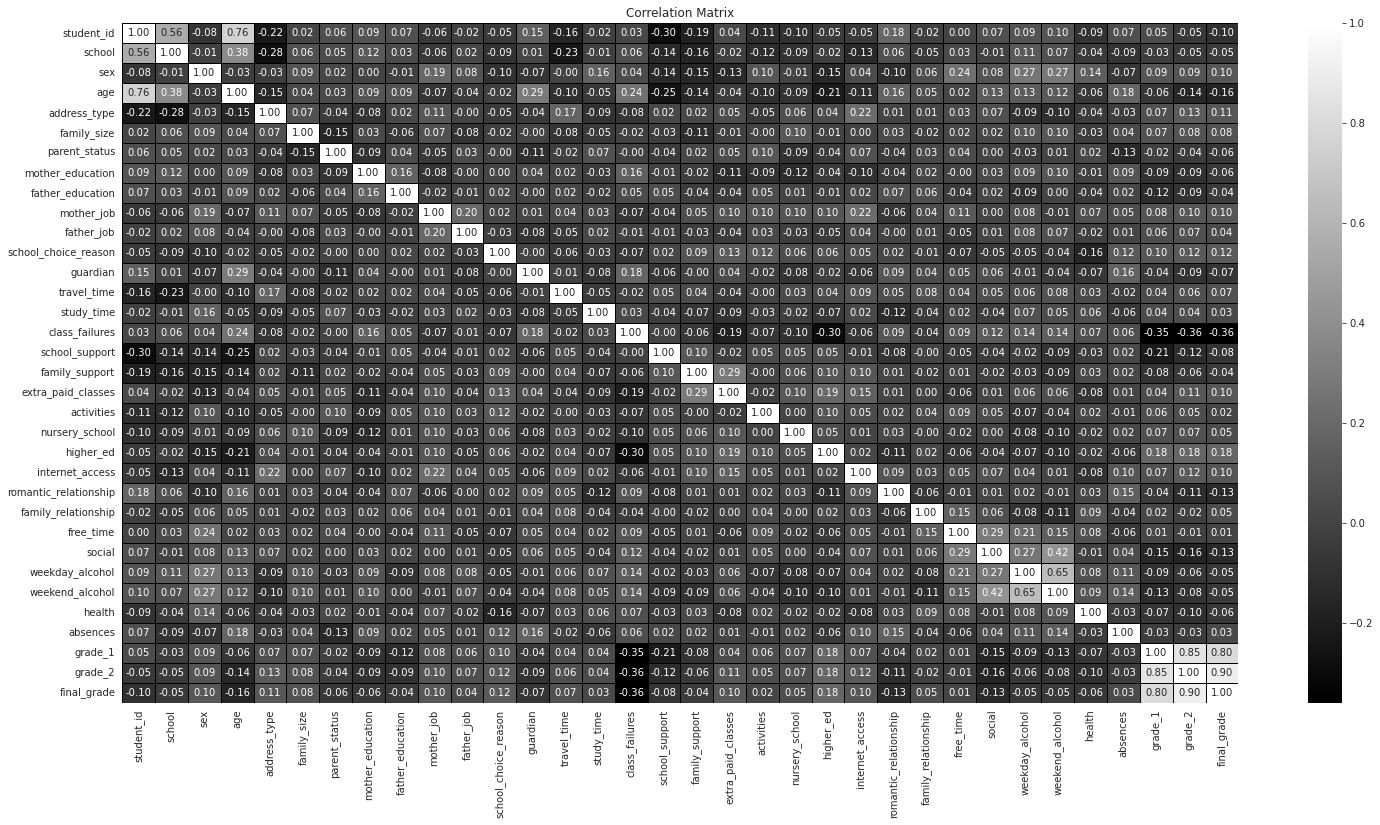

In [72]:
correlation_matrix = copy.deepcopy(df_numerized)
correlation_matrix = correlation_matrix.corr(method = 'pearson').dropna(how="all")
correlation_matrix = correlation_matrix.dropna(axis=1, how="all")

sns.heatmap(correlation_matrix, annot=True, linewidths=1, linecolor="black",cmap="gray",fmt=",.2f",
           xticklabels = 1, yticklabels = 1)
plt.gcf().set_size_inches(25,12.5)
plt.title("Correlation Matrix")
plt.show()

In [73]:
correlation_matrix["final_grade"].sort_values(ascending=False).reset_index(name="Correlation").style.background_gradient("gray")


,index,Correlation
0,final_grade,1.000000
1,grade_2,0.904868
2,grade_1,0.801468
3,higher_ed,0.182465
4,school_choice_reason,0.121994
5,address_type,0.105756
6,sex,0.103456
7,mother_job,0.102082
8,extra_paid_classes,0.101996
9,internet_access,0.098483


In [74]:
for col in df.loc[:,df.columns!="student_id"]:
    print(col.ljust(25), sorted(df[col].unique()))
    

school                    ['GP', 'MS']
sex                       ['F', 'M']
age                       [15, 16, 17, 18, 19, 20, 21, 22]
address_type              ['Rural', 'Urban']
family_size               ['Greater than 3', 'Less than or equal to 3']
parent_status             ['Apart', 'Living together']
mother_education          ['5th to 9th grade', 'higher education', 'none', 'primary education (4th grade)', 'secondary education']
father_education          ['5th to 9th grade', 'higher education', 'none', 'primary education (4th grade)', 'secondary education']
mother_job                ['at_home', 'health', 'other', 'services', 'teacher']
father_job                ['at_home', 'health', 'other', 'services', 'teacher']
school_choice_reason      ['course', 'home', 'other', 'reputation']
guardian                  ['father', 'mother', 'other']
travel_time               ['15 to 30 min.', '30 min. to 1 hour', '<15 min.', '>1 hour']
study_time                ['2 to 5 hours', '5 to 10 hours',

In [75]:
df["rank"] = round(df["final_grade"].rank(method="first", ascending=False, pct=True),4)*100

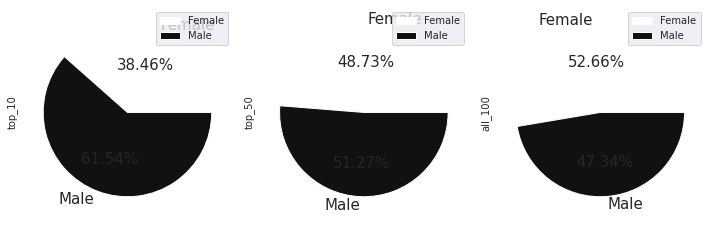

In [76]:
top_10 = df[df["rank"]<=10].groupby(df["sex"]).size().reset_index(name="count")
top_50 = df[df["rank"]<=50].groupby(df["sex"]).size().reset_index(name="count")
all_100 = df[df["rank"]<=100].groupby(df["sex"]).size().reset_index(name="count")

all_100=top_10.merge(top_50, on="sex").merge(all_100, on="sex")
all_100.rename(columns={"count_x":"top_10", "count_y":"top_50","count":"all_100"}, inplace=True)

colors = ["#ffffff","#111111"]

all_100[["top_10","top_50","all_100"]].plot.pie(subplots=True,figsize=(10,5),
                                                autopct="%1.2f%%",colors=colors,labels=["Female","Male"],
                                               textprops={"fontsize":15})
plt.tight_layout()
plt.show()

* social - going out with friends (numeric: from 1 - very low to 5 - very high)
* absences - number of school absences (numeric: from 0 to 93)

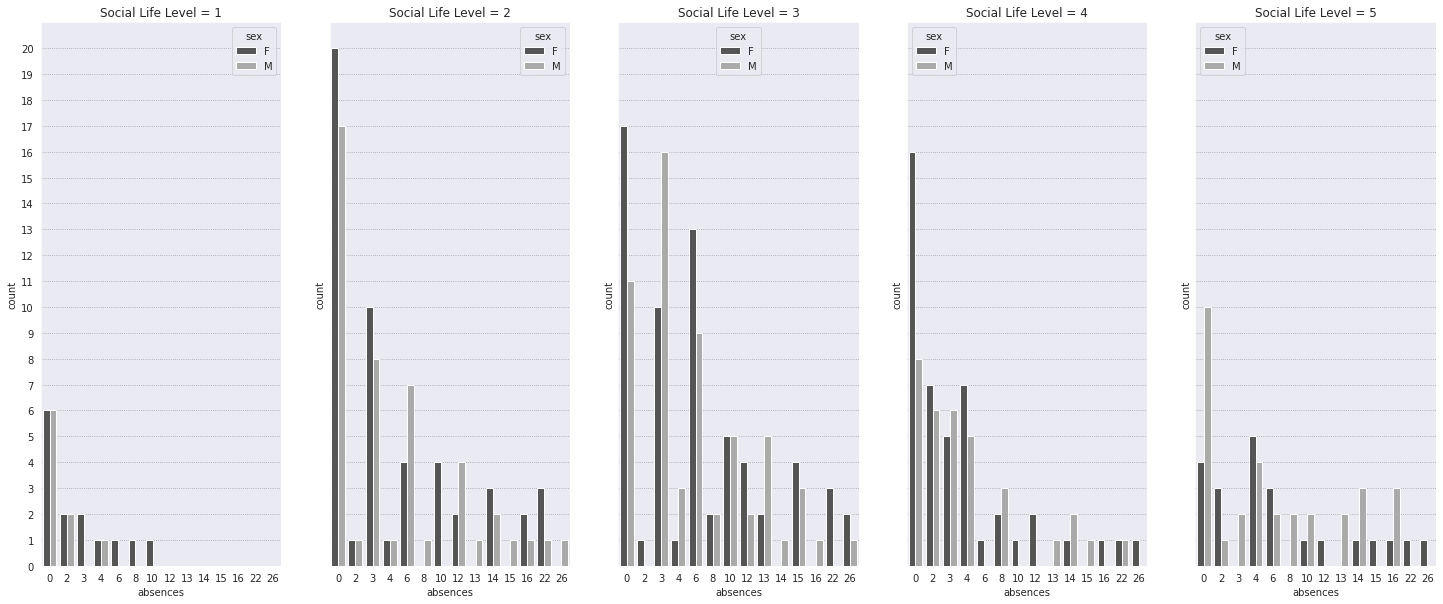

In [100]:
fig, axes = plt.subplots(1,5,figsize=(25,10),sharey=True,sharex=True)
axes = axes.flatten()

for i in range(6):
    try:
        plot = df[df["social"]==i+1]
        sns.countplot(data=plot,x="absences",hue="sex", palette="gray", ax=axes[i], hue_order=["F","M"])
        axes[i].set_title(f"Social Life Level = {i+1}")
    except IndexError:
        pass
  
plt.yticks(range(21))
plt.show()